# **Comparative Analysis of Machine Learning Models for Classification**

**Introduction:**
In this notebook, we compare the performance of three popular machine learning models—Logistic Regression, Random Forest, and Support Vector Machine—for a classification task. The dataset used for this analysis contains features that are known to influence the target variable, making it suitable for exploring the efficacy of these models in classification tasks.

**Results:**
After training the models on the dataset, we obtained the following accuracy scores:

- Logistic Regression - Accuracy: 0.7897
- Random Forest - Accuracy: 0.9981
- Support Vector Machine - Accuracy: 0.9513

The Random Forest model outperformed the other models, achieving an accuracy of 0.9981. This indicates that the Random Forest model is the best performing model for this dataset.

# **1. Import Libraries**
Import the necessary libraries for the project.

In [69]:
# Importación de librerías necesarias
import pandas as pd # Manipulación de datos.
import matplotlib.pyplot as plt # Visualización gráfica básica.
import seaborn as sns # Visualización avanzada y estética.
import numpy as np # Algebra lineal.
from sklearn.model_selection import train_test_split # Divide los datos en entrenamiento y prueba.
from sklearn.linear_model import LogisticRegression # Modelo de clasificación lineal.
from sklearn.ensemble import RandomForestClassifier # Modelo de clasificación basado en árboles.
from sklearn.svm import SVC # Clasificación con máquinas de soporte vectorial.
from sklearn.metrics import accuracy_score # Calcula la precisión del modelo.
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVR

# **2. Load Data**
Load the data from the CSV file.

In [2]:
data = pd.read_csv('C:/Users/user/Desktop/Machine-Learning/hemograma.csv')

In [11]:
data.head()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   object 
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5132.0,2565.500000,1481.625121,0.000000,1282.75,2565.50,3848.25,5131.00
Age,5132.0,48.950312,14.048794,20.000000,36.00,49.00,59.00,93.00
BMI,5132.0,24.613406,4.277205,15.000000,22.00,24.00,27.00,47.00
Chol,5132.0,4.866882,1.001052,0.000000,4.19,4.80,5.46,11.65
TG,5132.0,1.719328,1.327057,0.000000,0.91,1.38,2.10,32.64
HDL,5132.0,1.593305,1.038849,0.000000,1.09,1.30,1.59,9.90
LDL,5132.0,2.914121,0.945423,0.300000,2.29,2.79,3.40,9.90
Cr,5132.0,71.144800,28.494394,4.860753,58.00,70.20,81.60,800.00
BUN,5132.0,4.896969,1.689206,0.500000,3.90,4.72,5.60,38.90
Diagnosis,5132.0,0.388348,0.487422,0.000000,0.00,0.00,1.00,1.00


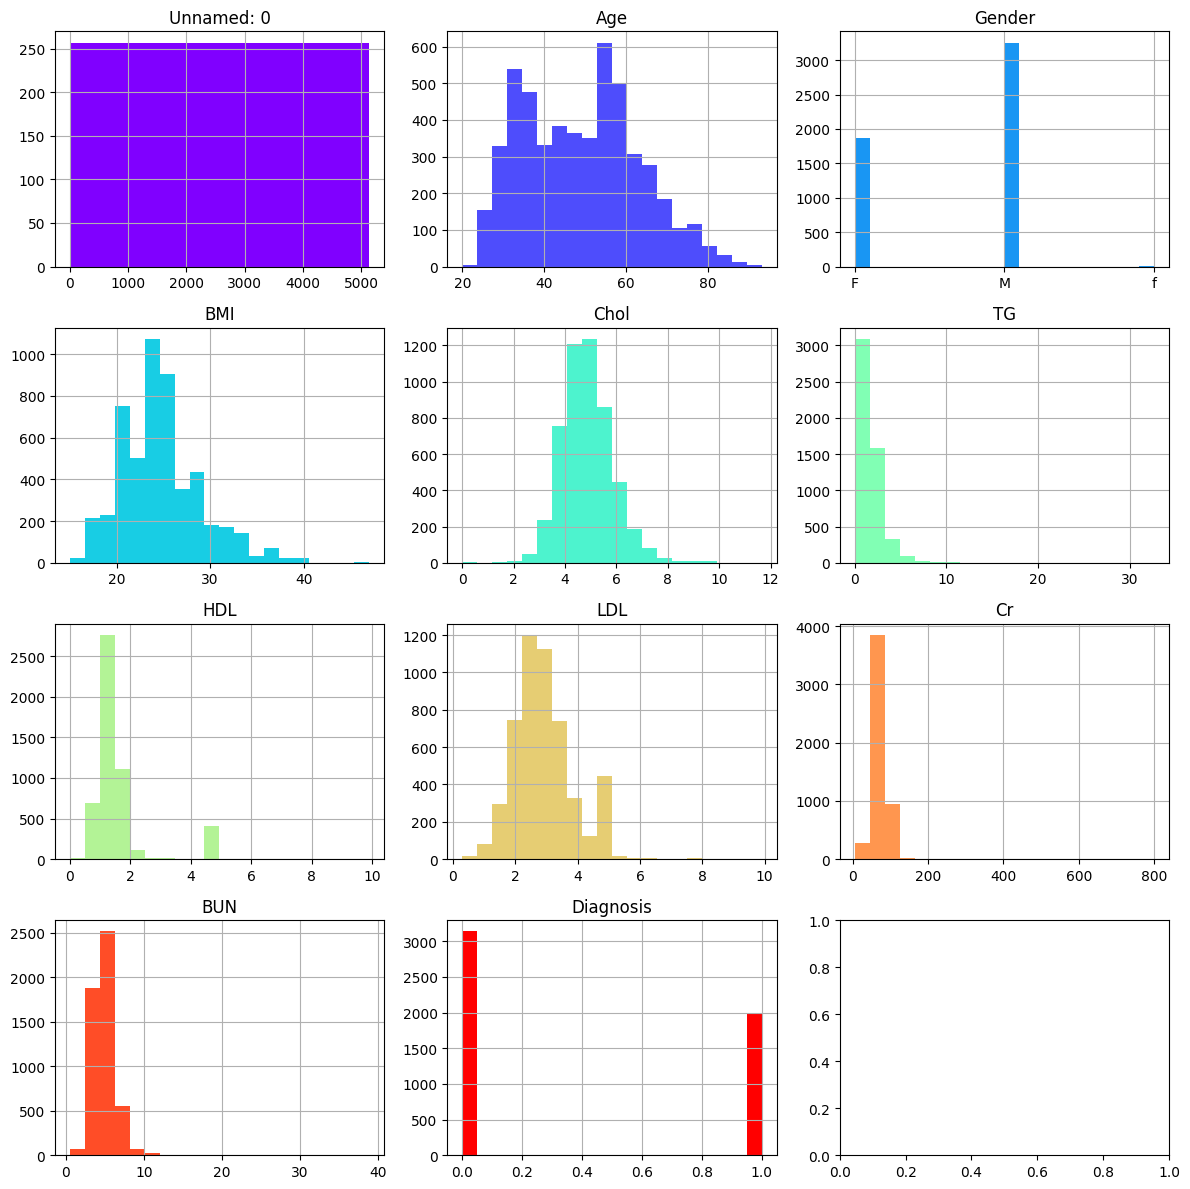

In [19]:
# Obtener los nombres de las columnas
columns = data.columns

# Crear un histograma para cada columna con un color diferente
fig, axes = plt.subplots(len(columns)//3 + 1, 3, figsize=(12, 12)) # Crear subplots
axes = axes.flatten()

# Colores del arcoíris para cada gráfico
colors = plt.cm.rainbow(np.linspace(0, 1, len(columns)))

# Crear histogramas
for i, col in enumerate(columns):
    data[col].hist(bins=20, ax=axes[i], color=colors[i])
    axes[i].set_title(col)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [35]:
# Seleccionar solo las columnas relevantes
numeric_columns = ['BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']
data_numeric = data[numeric_columns].copy()

# **3. Data Preprocessing**
Convert categorical variables into numerical variables.

# **4. Predictive Modeling**
Split the data into training and test sets, then train several models and evaluate their accuracy.

In [42]:
X = data_encoded.drop('Diagnosis', axis=1)
y = data_encoded['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

best_model_name = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

    print(f"{name} - Accuracy: {accuracy}")

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.801363193768257
Random Forest - Accuracy: 0.997078870496592
Support Vector Machine - Accuracy: 0.9513145082765336


# **5. Results**
Display the results of the trained models.

In [43]:
print(f"\nBest Model: {best_model_name} - Accuracy: {best_accuracy}")


Best Model: Random Forest - Accuracy: 0.997078870496592


# **6. Data Visualization**
Display visualizations to better understand the data and model results.

In [44]:
encoded_data = pd.get_dummies(data)

In [45]:
correlations = encoded_data.corr()

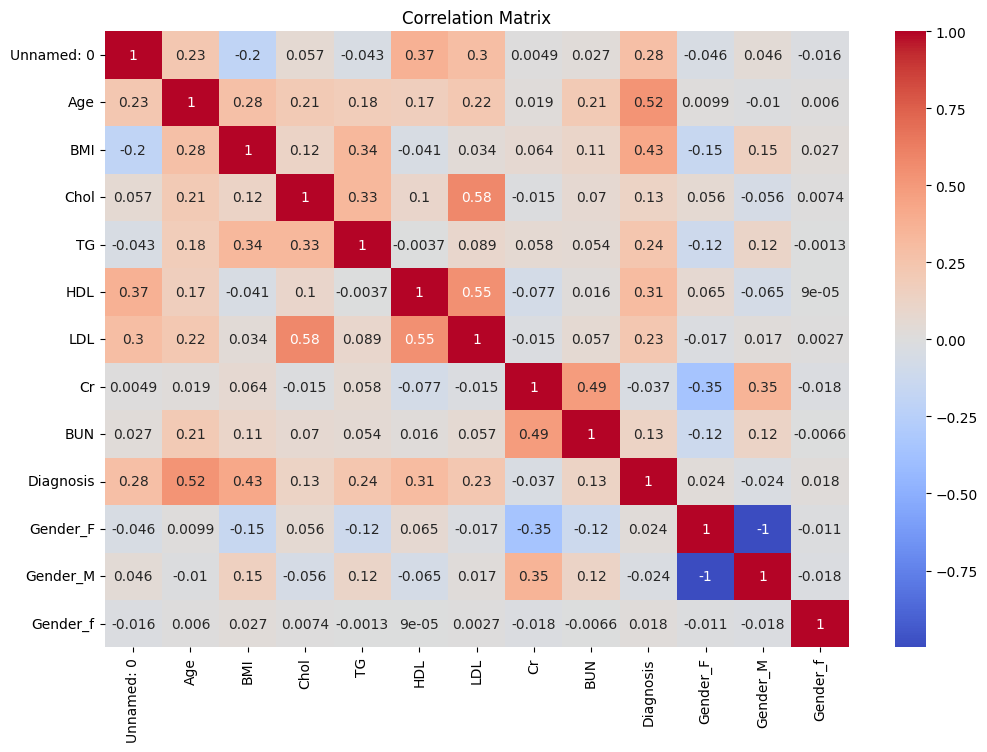

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Filtrar las columnas que deseas usar
features = ['BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN']
X = data[features]
y = data['BUN']  # Asumiendo que 'Diagnosis' es la variable objetivo

In [48]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Regresión Lineal
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_r2 = r2_score(y_test, lin_pred)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

# Mostrar resultados
print(f"Linear Regression - MSE: {lin_mse}, R²: {lin_r2}")
print(f"Random Forest Regression - MSE: {rf_mse}, R²: {rf_r2}")
print(f"Support Vector Regression - MSE: {svr_mse}, R²: {svr_r2}")

Linear Regression - MSE: 7.055005062540106e-30, R²: 1.0
Random Forest Regression - MSE: 0.017670251666565457, R²: 0.9931533789499364
Support Vector Regression - MSE: 0.39978237702753194, R²: 0.845097936936561


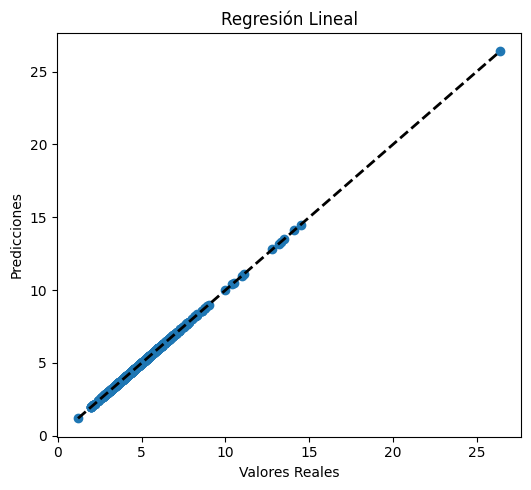

Linear Regression - MSE: 7.055005062540106e-30, R²: 1.0


In [62]:
# Comparar predicciones con los valores reales para cada modelo
plt.figure(figsize=(15, 5))

# Gráfica para Regresión Lineal
plt.subplot(1, 3, 1)
plt.scatter(y_test, lin_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal')

plt.tight_layout()
plt.show()
print(f"Linear Regression - MSE: {lin_mse}, R²: {lin_r2}")

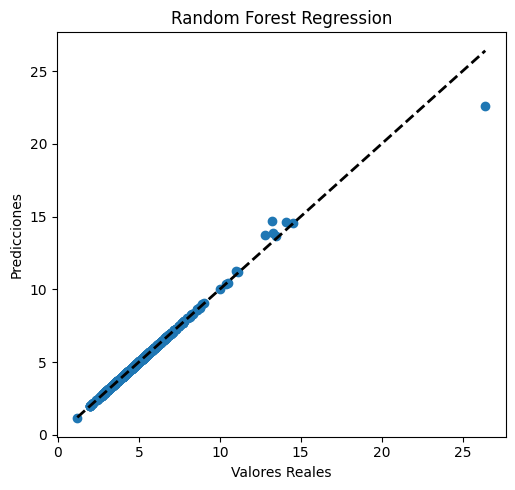

Random Forest Regression - MSE: 0.017670251666565457, R²: 0.9931533789499364


In [63]:
# Gráfica para Random Forest Regressor
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Random Forest Regression')
plt.tight_layout()
plt.show()
print(f"Random Forest Regression - MSE: {rf_mse}, R²: {rf_r2}")

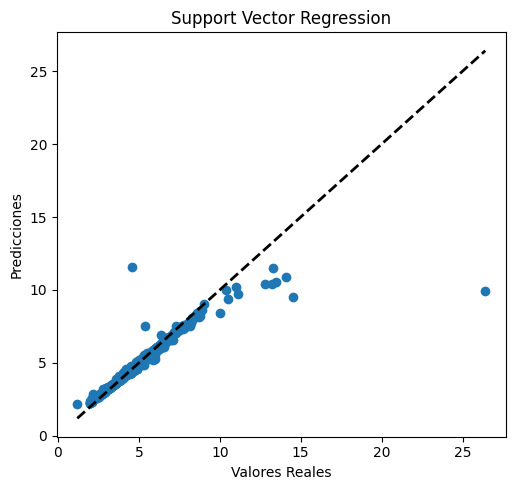

Support Vector Regression - MSE: 0.39978237702753194, R²: 0.845097936936561


In [64]:
# Gráfica para Support Vector Regression
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.scatter(y_test, svr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Support Vector Regression')
plt.tight_layout()
plt.show()
print(f"Support Vector Regression - MSE: {svr_mse}, R²: {svr_r2}")

In [66]:
# Calcular métricas para Regresión Lineal
lin_mae = mean_absolute_error(y_test, lin_pred)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = mean_squared_error(y_test, lin_pred, squared=False)  # RMSE
lin_r2 = r2_score(y_test, lin_pred)


# Mostrar resultados
print("Regresión Lineal:")
print(f"MAE: {lin_mae:.2f}, MSE: {lin_mse:.2f}, RMSE: {lin_rmse:.2f}, R²: {lin_r2:.2f}\n")

Regresión Lineal:
MAE: 0.00, MSE: 0.00, RMSE: 0.00, R²: 1.00



C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
# Calcular métricas para Random Forest Regressor
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)  # RMSE
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor:")
print(f"MAE: {rf_mae:.2f}, MSE: {rf_mse:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}\n")


Random Forest Regressor:
MAE: 0.01, MSE: 0.02, RMSE: 0.13, R²: 0.99



C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [68]:
# Calcular métricas para Support Vector Regression
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = mean_squared_error(y_test, svr_pred, squared=False)  # RMSE
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression:")
print(f"MAE: {svr_mae:.2f}, MSE: {svr_mse:.2f}, RMSE: {svr_rmse:.2f}, R²: {svr_r2:.2f}\n")

Support Vector Regression:
MAE: 0.14, MSE: 0.40, RMSE: 0.63, R²: 0.85



C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
# Listas de modelos y predicciones
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine']
predictions = [lin_pred, rf_pred, svr_pred]

# Evaluación de los modelos solo en cuanto a la exactitud
for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test)  # Calcula la exactitud
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy:.4f}")  # Muestra la exactitud con 4 decimales
    print("\n")

TypeError: missing a required argument: 'y_pred'